In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import database_credentials as dc

In [2]:
# Database credentials
postgres_user = dc.user()
postgres_pw = dc.pw()
postgres_host = dc.host()
postgres_port = dc.port()
postgres_db = dc.db()

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

In [3]:
# creating a table for loadboard activity
# app_version, platform, browser, app_name, heap_app_version
sql = '''
select session_id, user_id, date("time"), library, device_type, carrier
from heap.slb_opened_load_details
WHERE date("time") >= date(current_date - interval '28 days')
AND date("time") < date(current_date)
'''
viewed_load_sessions = pd.read_sql_query(sql, con=engine)
viewed_load_sessions = viewed_load_sessions.rename(columns={'date': 'load_viewed_at', 'user_id': 'heap_user_id'})
viewed_load_sessions

,session_id,heap_user_id,load_viewed_at,library,device_type,carrier
0,4294913935562270,6399625534789261,2020-12-22,web,Mobile,None
1,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None
2,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None
3,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None
4,7996262892566347,4813209314392706,2020-12-22,web,Mobile,None
...,...,...,...,...,...,...
62751,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None
62752,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None
62753,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None
62754,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None


In [4]:
viewed_load_sessions.describe(include='all')

,session_id,heap_user_id,load_viewed_at,library,device_type,carrier
count,6.275600e+04,6.275600e+04,62756,62756,62756,0
unique,NaN,NaN,28,1,3,0
top,NaN,NaN,2021-01-13,web,Mobile,NaN
freq,NaN,NaN,3609,62756,43290,NaN
mean,4.486819e+15,4.347370e+15,NaN,NaN,NaN,NaN
std,2.590668e+15,2.502018e+15,NaN,NaN,NaN,NaN
min,1.794849e+11,2.754904e+12,NaN,NaN,NaN,NaN
25%,2.258520e+15,2.095248e+15,NaN,NaN,NaN,NaN
50%,4.493858e+15,4.320036e+15,NaN,NaN,NaN,NaN
75%,6.717586e+15,6.328984e+15,NaN,NaN,NaN,NaN


In [5]:
# creating a table for heap users
sql = '''
SELECT user_id, "identity", company_id, company_name
FROM heap.users
WHERE role = 'Dispatcher'
'''
heap_users_dispatchers = pd.read_sql_query(sql, con=engine)
heap_users_dispatchers = heap_users_dispatchers.rename(columns={'user_id': 'heap_user_id', 'identity': 'dispatcher_guid',
                                        'company_id': 'carrier_guid'})
heap_users_dispatchers

,heap_user_id,dispatcher_guid,carrier_guid,company_name
0,5770577977256720,bbd24a5c-6dac-4d4b-a748-814bcc5580b1,2454b10b-3ca1-43bc-8727-30457cc5149e,TORNADO AUTO HAULERS INC
1,1395391644577009,dea35d87-3b28-421d-bece-5f8d1be88b09,319ec6e3-1d17-498b-bec6-e8f509ffe404,Dispatch Transport Logic In-TEST
2,7165583539476865,b7deecff-d2b5-4cc1-8a9b-488f3698d102,cea1ad24-f58f-4449-b4a7-3957f5f0f129,Trimika Auto Transport
3,1684890345407840,73b13f11-8d68-4ba1-bb04-ec7148d5a313,f17507f8-9c22-4e86-ab06-6407f189086a,Shore Logistics LLC
4,3178014634371712,f56d0b2b-6786-40da-9ed1-38888123687c,83118c41-063b-4abd-b99a-cd6b8cabcbc3,Titan Transport Solutions LLC
...,...,...,...,...
21212,1710186200184194,1e21b98f-deed-45d7-9a98-e6d600bdd016,None,None
21213,8588002574947043,959fcb79-af5b-4965-98f8-fe292bed4993,None,None
21214,4932027215397874,b3092fbe-8b32-4b60-9732-4ab655b2837c,8b1b21ac-e93b-499b-80ad-af6e19feec8a,ACTS LLC
21215,7114517728771966,b8c9bee5-c961-420a-92f4-f2a97fdd19a5,None,None


In [6]:
# creating a table for heap users
sql = '''
SELECT user_id, "identity", company_id, company_name
FROM heap.users
WHERE role = 'Driver'
'''
heap_users_drivers = pd.read_sql_query(sql, con=engine)
heap_users_drivers = heap_users_drivers.rename(columns={'user_id': 'heap_user_id', 'identity': 'driver_guid',
                                        'company_id': 'carrier_guid'})
heap_users_drivers

,heap_user_id,driver_guid,carrier_guid,company_name
0,6807024858885883,f6bb8ed9-6149-41b2-993b-e92b6af03cf1,9a98d372-5425-4d47-929a-01918932d763,Logitrans llc
1,2572887914923971,fe9235d4-3ddb-4b7f-91ce-b4caf535f535,a776c65a-19e3-424d-a032-d9118dee1c52,PUSKAS TRUCKING INC
2,4080565631628748,d41884bd-3b7e-4f4d-b3f3-f8d055480594,None,None
3,2130327118247784,8343e4df-fd1a-4aff-8cb6-ba0afcb6cfa8,d841a787-cd06-42e2-967b-ab8c67e0b321,MILLENNIUM GROUP INC OF IL
4,5825757294889074,1ed54f0c-b6cd-461b-8e75-4928776de8b1,2addf6fe-f040-43f8-958b-87db96066ae4,SHAROF TRANS INC
...,...,...,...,...
41361,6783672169730419,cfcc95a4-1973-4e15-a288-e8de0296b2cd,None,None
41362,972542984196282,2ada3f5d-c2e6-412a-8e66-7fd0fb3f710e,None,None
41363,206961644502765,738799bd-5d82-441b-a784-8bdceb6cf7c1,None,None
41364,8178085916445636,63cb9909-8d45-4f91-8b5d-5cdc8beae32d,None,None


In [7]:
viewed_load_sessions_2 = viewed_load_sessions.merge(heap_users_dispatchers, left_on='heap_user_id', right_on='heap_user_id')
viewed_load_sessions_2

,session_id,heap_user_id,load_viewed_at,library,device_type,carrier,dispatcher_guid,carrier_guid,company_name
0,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC
1,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC
2,8032953045027961,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC
3,4755883039121114,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC
4,7733753777126210,6317963538292170,2020-12-22,web,Desktop,None,ca64acfe-7a84-4c50-8256-a5b394175e89,750eedf6-1725-4173-bbbf-93714c8102eb,Executive Transport LLC
...,...,...,...,...,...,...,...,...,...
20051,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None,4a3208fa-f4d0-46e9-b56d-5402846f785a,None,None
20052,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None,4a3208fa-f4d0-46e9-b56d-5402846f785a,None,None
20053,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None,4a3208fa-f4d0-46e9-b56d-5402846f785a,None,None
20054,1457224600462085,7342614679095549,2021-01-18,web,Mobile,None,4a3208fa-f4d0-46e9-b56d-5402846f785a,None,None


In [8]:
viewed_load_sessions_2.isna().sum()/viewed_load_sessions_2.isna().count()

session_id         0.000000
heap_user_id       0.000000
load_viewed_at     0.000000
library            0.000000
device_type        0.000000
carrier            1.000000
dispatcher_guid    0.000000
carrier_guid       0.017002
company_name       0.017002
dtype: float64

In [9]:
# creating a table for carriers
sql = '''
SELECT name, guid, id
FROM ctms_db_public.msd_carrier
WHERE test_account = False
'''
carriers = pd.read_sql_query(sql, con=engine)
carriers = carriers.rename(columns={'id': 'carrier_id', 'guid': 'carrier_guid', 'name': 'carrier_name'})
carriers

,carrier_name,carrier_guid,carrier_id
0,ayman,71918a40-f1df-4b52-b925-129ed39183f1,7
1,CN2,c623837b-04ee-4cf7-a44c-bca993c4d057,16
2,Transcontinental Express LLC,e835ef60-4200-4863-916a-0eed5bd18f93,25
3,Sifuentes Auto Transport,0a142cbc-cc41-42be-96cc-9bee4dde0929,29
4,A1 USA Express,e97661bf-33fa-4b77-b4b4-23c960e54da8,37
...,...,...,...
40888,AXIS TRANSPORTATION AND LOGISTICS LLC,247627df-ba58-4e8d-8de7-0a1b27324362,39771
40889,TRANSPORTING INVOICE,ee44f70f-3ca3-44a9-98b0-8e2281994b28,1861
40890,Suffy Transport,cdb6346e-1ba1-42a8-a9c3-e7bf2fb9a5d6,20694
40891,ALL AMERICAN RV SERVICES LLC,cccd264d-7453-4fbc-b76f-2074c73d5134,32349


In [10]:
# creating a table of drivers to get driver guid
sql = '''
SELECT genericuser_ptr_id, carrier_id, guid
FROM ctms_db_public.msd_driver
WHERE is_suspended = False
'''
drivers = pd.read_sql_query(sql, con=engine)
drivers = drivers.rename(columns={'guid': 'driver_guid', 'genericuser_ptr_id': 'driver_id'})
drivers

,driver_id,carrier_id,driver_guid
0,27,5478,4d7b7eb2-342c-4712-b3a9-573b2c47806b
1,77,5478,19bb361d-b9ba-4216-98cb-615bf8fc60a1
2,95,36,6fd348b4-7549-4377-a5e0-1c84494e0723
3,111,49,2e3710b3-9c35-41db-942e-ae83c7199218
4,129,5478,e0f4ea96-c069-4219-a2c4-671f29f5deb7
...,...,...,...
62970,84478,34878,fadba91f-a9ef-4968-a47e-dc5371c2a036
62971,84761,166,8eb7ddc1-3489-4c30-8128-9993d0072b7d
62972,84975,13642,62d38c0d-4afd-43e0-ac45-3411bd388114
62973,85358,2305,2c220ce5-1228-427f-8fde-b3e7c3ffd02e


In [11]:
drivers_w_carrier = drivers.merge(carriers, left_on='carrier_id', right_on='carrier_id')
drivers_w_carrier

,driver_id,carrier_id,driver_guid,carrier_name,carrier_guid
0,27,5478,4d7b7eb2-342c-4712-b3a9-573b2c47806b,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
1,77,5478,19bb361d-b9ba-4216-98cb-615bf8fc60a1,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
2,129,5478,e0f4ea96-c069-4219-a2c4-671f29f5deb7,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
3,147,5478,ebba4a93-65b5-4a12-8689-38764d55b418,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
4,369,5478,c75a7f76-c430-4094-95e5-950258a197fd,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
...,...,...,...,...,...
62223,77870,41433,cb0643db-fcc8-4241-817c-4500037f895b,KEY TOWING,97623688-c361-4d4a-a657-94feacd4f5ec
62224,78690,41731,b038530d-2b32-440f-af6b-70765f740848,RJ Driver Services Inc.,cc9c560b-ba59-4b19-9ea8-3c8abcbda2e9
62225,81254,42703,866ed014-10dc-405a-8973-e00b5ed4cf19,L V V TRANSPORTATION INC,8235dace-dbf7-46f5-a698-08c95ac42534
62226,82750,43220,989b5996-9da5-4879-a966-bae03688de7b,WA EXPRESS INC,fdabd65a-c1a9-4df9-b140-9ec13373f087


In [12]:
# findind the unique number of activated drivers for each carrier
active_driver_count = (drivers_w_carrier.groupby(['carrier_guid', 'carrier_id', 'carrier_name'])
                                                        [['driver_guid']].nunique())
active_driver_count.reset_index(inplace=True)
active_driver_count = active_driver_count.rename(columns={'driver_guid': 'activated_drivers'})
active_driver_count

,carrier_guid,carrier_id,carrier_name,activated_drivers
0,000243e7-afae-455a-8e61-5c691916f39e,31952,PERFECT SERVICES LLC,1
1,0004758e-daf4-4d3f-8257-be49db385d8e,1198,Flete,1
2,000acb9e-e4bb-4cff-a5b3-3bedcf05babf,29808,R-MICHAEL ENT LLC,1
3,000b7030-5bfc-4c95-8627-df29412347ff,43133,MACROD TOWING LLC,1
4,000b8e63-986b-4bae-befe-22481e2bfc9c,32277,AB TRANSPORT SERVICE,1
...,...,...,...,...
38479,fff8e9ba-cbcd-4bf7-8f92-b00fba5ba543,9501,Alpha Transport,1
38480,fffa8e6a-3943-47f5-bc00-52f59d9cd0c6,28014,NEAGU INC,1
38481,fffb578c-7297-4ade-996d-eef9aed6c22c,9916,SAM TRANSPORT LLC,1
38482,ffff3737-7524-40a4-b225-a8832c96bf91,6038,Gshsh,1


In [13]:
viewed_load_sessions_3 = viewed_load_sessions_2.merge(active_driver_count,
                                        left_on='carrier_guid', right_on='carrier_guid')
# only small carriers
viewed_load_sessions_3 = viewed_load_sessions_3[viewed_load_sessions_3['activated_drivers'] == 1]
viewed_load_sessions_3

,session_id,heap_user_id,load_viewed_at,library,device_type,carrier,dispatcher_guid,carrier_guid,company_name,carrier_id,carrier_name,activated_drivers
137,3929199510489345,8082566931844781,2020-12-22,web,Desktop,None,f3f273fd-ddfb-406f-b891-a5a2dd4acb8e,cb104b51-1f35-4921-800a-bd84bf1d2eb8,SPEEDIE RECOVERY OF SOUTH FLORIDA INC,43496,SPEEDIE RECOVERY OF SOUTH FLORIDA INC,1
138,3929199510489345,8082566931844781,2020-12-22,web,Desktop,None,f3f273fd-ddfb-406f-b891-a5a2dd4acb8e,cb104b51-1f35-4921-800a-bd84bf1d2eb8,SPEEDIE RECOVERY OF SOUTH FLORIDA INC,43496,SPEEDIE RECOVERY OF SOUTH FLORIDA INC,1
139,3929199510489345,8082566931844781,2020-12-22,web,Desktop,None,f3f273fd-ddfb-406f-b891-a5a2dd4acb8e,cb104b51-1f35-4921-800a-bd84bf1d2eb8,SPEEDIE RECOVERY OF SOUTH FLORIDA INC,43496,SPEEDIE RECOVERY OF SOUTH FLORIDA INC,1
140,197404247011053,8082566931844781,2020-12-27,web,Desktop,None,f3f273fd-ddfb-406f-b891-a5a2dd4acb8e,cb104b51-1f35-4921-800a-bd84bf1d2eb8,SPEEDIE RECOVERY OF SOUTH FLORIDA INC,43496,SPEEDIE RECOVERY OF SOUTH FLORIDA INC,1
141,8502681786332621,8082566931844781,2020-12-28,web,Desktop,None,f3f273fd-ddfb-406f-b891-a5a2dd4acb8e,cb104b51-1f35-4921-800a-bd84bf1d2eb8,SPEEDIE RECOVERY OF SOUTH FLORIDA INC,43496,SPEEDIE RECOVERY OF SOUTH FLORIDA INC,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19376,5540770787305233,6192688020150405,2021-01-15,web,Mobile,None,d126f07f-9844-4ed9-8cad-4d6fddbce24d,40a56402-3ed5-4a12-b281-165603488e70,CRUZ AUTO TRANSPORT LLC,32955,CRUZ AUTO TRANSPORT LLC,1
19377,5540770787305233,6192688020150405,2021-01-15,web,Mobile,None,d126f07f-9844-4ed9-8cad-4d6fddbce24d,40a56402-3ed5-4a12-b281-165603488e70,CRUZ AUTO TRANSPORT LLC,32955,CRUZ AUTO TRANSPORT LLC,1
19378,3448517803657815,6192688020150405,2021-01-15,web,Mobile,None,d126f07f-9844-4ed9-8cad-4d6fddbce24d,40a56402-3ed5-4a12-b281-165603488e70,CRUZ AUTO TRANSPORT LLC,32955,CRUZ AUTO TRANSPORT LLC,1
19401,8663233386029478,5925236574418249,2021-01-17,web,Desktop,None,f23cf26b-7abc-4784-8195-899b56d2e985,117e9c4b-4178-4899-a754-c23e5d5dacf7,IVGV LLC,44406,IVGV LLC,1


In [14]:
result = viewed_load_sessions_3.groupby(['carrier_guid', 'carrier_id']).nunique()[['load_viewed_at']]
result.reset_index(inplace=True)
result = result.rename(columns={'load_viewed_at': 'unique_days_viewed_load_details'})
result

,carrier_guid,carrier_id,unique_days_viewed_load_details
0,00533bf5-6a07-4a9b-a56e-d7bcec9375d1,17637,2
1,0146e319-5718-4c12-9bd1-709247ecaab0,36810,9
2,02071667-e6ae-4a1b-8067-bb6ab008243c,42868,20
3,0228653b-f6e9-4eac-8796-c9c0bebb7dfe,34732,1
4,03281411-c9c9-40ec-a801-9d2b925bed10,5260,2
...,...,...,...
435,fc9394ca-f42f-4e0f-87f8-bf1e27bd982b,39244,2
436,fcc9aa11-d98d-441a-9541-eef823460ce2,37845,1
437,fcfbeb63-19c6-4a7c-b23b-4d9e5c34167e,44114,2
438,fddade2a-a826-426b-9cd7-64b4e6786af3,43497,4


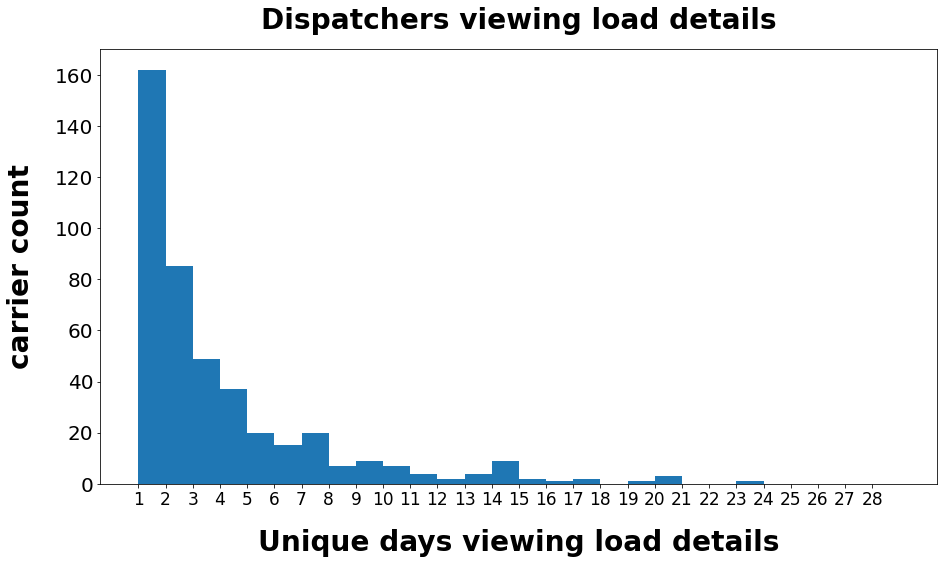

In [15]:
# histogram of unique accepted offers in last 28 days (all carriers)
plt.figure(figsize=(15,8))
plt.hist(result['unique_days_viewed_load_details'], bins=np.arange(1, 30))
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=20)
plt.xlabel('Unique days viewing load details', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('Dispatchers viewing load details', fontsize=28, fontweight='bold', pad=20)
plt.show()

# Now let's segment paid users and free users

In [16]:
# creating a table for braintree subscriptions
sql = '''
DROP TABLE IF EXISTS #carrier_with_latest_sub_date
;
SELECT 
carrier_id
,max(created_at) AS last_sub
INTO #carrier_with_latest_sub_date
FROM ctms_db_public.billing_braintreesubscription
WHERE braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
GROUP BY carrier_id
;
SELECT 
#carrier_with_latest_sub_date.carrier_id
,last_sub
,braintree_subscription_status
FROM #carrier_with_latest_sub_date
JOIN ctms_db_public.billing_braintreesubscription
ON #carrier_with_latest_sub_date.carrier_id = billing_braintreesubscription.carrier_id
AND #carrier_with_latest_sub_date.last_sub = billing_braintreesubscription.created_at
WHERE billing_braintreesubscription.braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
;
'''
braintree_subs = pd.read_sql_query(sql, con=engine)
braintree_subs

,carrier_id,last_sub,braintree_subscription_status
0,2978,2016-11-26 09:21:34.937541,Active
1,5164,2017-01-05 22:15:51.921429,Active
2,3109,2016-11-26 09:21:33.283626,Active
3,8280,2017-06-17 15:20:29.527819,Active
4,831,2016-11-26 09:21:32.012823,Active
...,...,...,...
2865,37735,2021-01-18 15:41:15.724377,Active
2866,26442,2021-01-18 18:44:02.175590,Active
2867,40915,2021-01-18 20:07:54.276443,Active
2868,7241,2021-01-18 20:40:43.572320,Active


In [17]:
# joining carriers with braintree table

braintree_with_carriers = braintree_subs.merge(carriers, left_on='carrier_id', right_on='carrier_id')
braintree_with_carriers

,carrier_id,last_sub,braintree_subscription_status,carrier_name,carrier_guid
0,2978,2016-11-26 09:21:34.937541,Active,AU-THENTIC INDUSTRIES LLC,1e1366e5-0c67-4019-bd33-e255416c7df7
1,5164,2017-01-05 22:15:51.921429,Active,Capital Trucking LLC,255749b3-8b17-421a-a3ed-353ca3472495
2,3109,2016-11-26 09:21:33.283626,Active,MEI Transportation Services Inc,49cdf08d-56ea-48c6-87d1-91515bf31639
3,8280,2017-06-17 15:20:29.527819,Active,ZPA Incorporated,ba962dbd-1e32-4caf-83e9-59db46983d6a
4,831,2016-11-26 09:21:32.012823,Active,Born Again Hauling,6f3b99e9-ad63-4ca1-abae-44b6c7cd0a14
...,...,...,...,...,...
2865,37735,2021-01-18 15:41:15.724377,Active,BLACK EAGLE TRANSPORTATION INC,3ff0ea7b-bfda-414a-8231-01e31ff027c2
2866,26442,2021-01-18 18:44:02.175590,Active,TRINITY DRIVE-AWAY LLC,782d3b6f-6ce2-47e2-984b-9eefb50096c9
2867,40915,2021-01-18 20:07:54.276443,Active,2517 INC,2d596f76-0137-4a06-b14b-556bad55f2e4
2868,7241,2021-01-18 20:40:43.572320,Active,DBN Trans Inc.,b81b0e8c-b9ec-4d73-85b8-ea3d10d7e962


# Paid users

In [18]:
result_paid_users = result.merge(braintree_with_carriers, left_on=['carrier_id', 'carrier_guid'],
                                                                   right_on=['carrier_id', 'carrier_guid'])
result_paid_users = result_paid_users[['carrier_guid', 'carrier_id', 'unique_days_viewed_load_details']]
result_paid_users

,carrier_guid,carrier_id,unique_days_viewed_load_details
0,0146e319-5718-4c12-9bd1-709247ecaab0,36810,9
1,02071667-e6ae-4a1b-8067-bb6ab008243c,42868,20
2,0228653b-f6e9-4eac-8796-c9c0bebb7dfe,34732,1
3,03281411-c9c9-40ec-a801-9d2b925bed10,5260,2
4,047c8377-67b3-4a7d-92f9-4a1593256ddf,26051,1
...,...,...,...
251,fbeb458d-f440-4b3d-ba4a-13f581a0d608,42989,1
252,fc5cea8c-5819-482b-b056-1011ccd2cf4f,31125,20
253,fcc9aa11-d98d-441a-9541-eef823460ce2,37845,1
254,fddade2a-a826-426b-9cd7-64b4e6786af3,43497,4


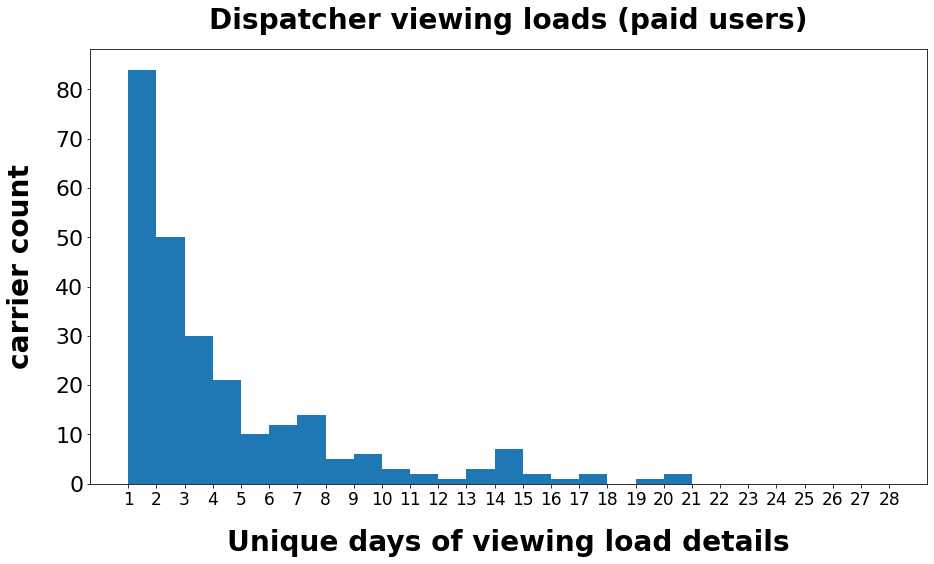

In [19]:
# histogram of unique days of driver activity (changing load status)
plt.figure(figsize=(15,8))
plt.hist(result_paid_users['unique_days_viewed_load_details'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=22)
plt.xlabel('Unique days of viewing load details', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('Dispatcher viewing loads (paid users)', fontsize=28, fontweight='bold', pad=20)
plt.show()

# Free users

In [20]:
result_free_users = result.merge(braintree_with_carriers, how='left', left_on=['carrier_id', 'carrier_guid'],
                                                                   right_on=['carrier_id', 'carrier_guid'])

non_payers = result_free_users['braintree_subscription_status'].isna() == True
result_free_users = result_free_users[non_payers]
result_free_users = result_free_users[['carrier_guid', 'carrier_id', 'unique_days_viewed_load_details']]
result_free_users

,carrier_guid,carrier_id,unique_days_viewed_load_details
0,00533bf5-6a07-4a9b-a56e-d7bcec9375d1,17637,2
5,03f32a1e-e5b2-4873-80e2-80a3fb60da49,43428,8
9,05cdc355-8b26-4a67-b181-2ccce36b89fa,26282,1
15,088f54bf-960d-4622-b4a2-ba08a422c605,43566,1
17,0a4e270a-36b4-4df1-8947-df3cbb50192a,43760,3
...,...,...,...
428,fa047392-ea06-4273-9122-fed33f1c620e,42646,5
430,fb02f035-92c4-4a53-beca-42aea86c6717,41899,1
433,fc0c5ff0-3287-4a41-b816-31dac9f0231e,33757,23
435,fc9394ca-f42f-4e0f-87f8-bf1e27bd982b,39244,2


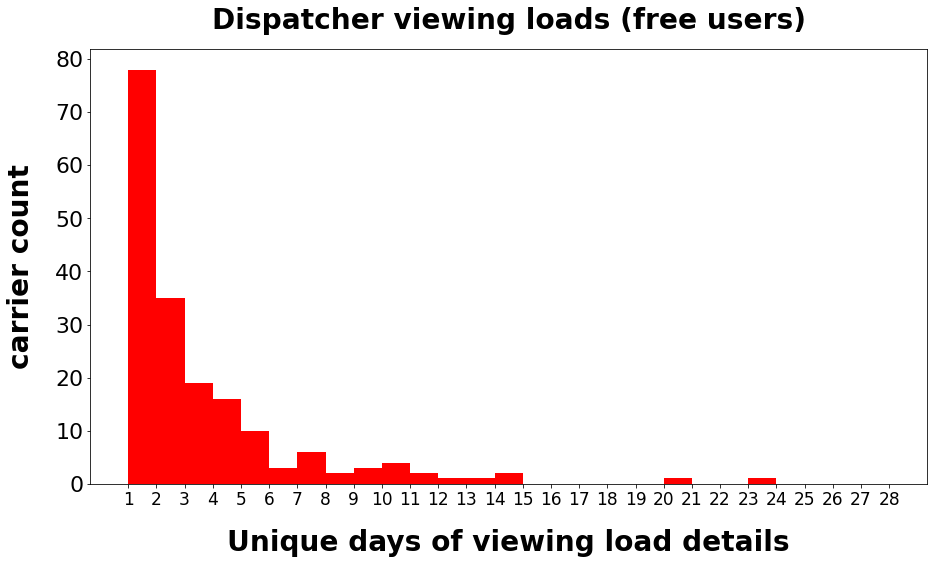

In [21]:
# histogram of unique days of driver activity (changing load status)
plt.figure(figsize=(15,8))
plt.hist(result_free_users['unique_days_viewed_load_details'], bins=np.arange(1, 29), color='red')
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=22)
plt.xlabel('Unique days of viewing load details', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('Dispatcher viewing loads (free users)', fontsize=28, fontweight='bold', pad=20)
plt.show()

In [22]:
total_paid_carriers_for_days_active = []

for i in range(1,29):
    paid_active_carrier_count = (result_paid_users[result_paid_users['unique_days_viewed_load_details'] >= i]
                           .groupby('unique_days_viewed_load_details').count()['carrier_guid'].sum())
    
    total_paid_carriers_for_days_active.append(paid_active_carrier_count)
    


total_free_carriers_for_days_active = []

for i in range(1,29):
    free_active_carrier_count = (result_free_users[result_free_users['unique_days_viewed_load_details'] >= i]
                           .groupby('unique_days_viewed_load_details').count()['carrier_guid'].sum())
    
    total_free_carriers_for_days_active.append(free_active_carrier_count)

In [23]:
all_paid_small_carriers = active_driver_count.merge(braintree_with_carriers,
                                                    left_on='carrier_guid', right_on='carrier_guid')
# getting only small carriers
all_paid_small_carriers = all_paid_small_carriers[all_paid_small_carriers['activated_drivers'] == 1]
all_paid_small_carriers

,carrier_guid,carrier_id_x,carrier_name_x,activated_drivers,carrier_id_y,last_sub,braintree_subscription_status,carrier_name_y
0,001c9f96-eca2-4ccc-a7a4-132bceec521c,24653,"BOSTONIA TRANSPORT & LOGISTICS, INC.",1,24653,2019-02-27 21:46:25.801517,Active,"BOSTONIA TRANSPORT & LOGISTICS, INC."
2,0030d1b8-449f-4acd-a04e-40ed6b45e1d1,31213,ROBERTS TRANSPORTATION SERVICES LLC,1,31213,2019-10-02 18:39:12.455800,Active,ROBERTS TRANSPORTATION SERVICES LLC
4,005b1bfa-6432-47b7-b785-beaa64f01ec4,29498,DARRYLGLEN TRANSPORT LLC,1,29498,2019-08-08 23:36:20.739446,Active,DARRYLGLEN TRANSPORT LLC
9,0146e319-5718-4c12-9bd1-709247ecaab0,36810,RIVER CITY SERVICES,1,36810,2020-07-24 18:10:42.998629,Active,RIVER CITY SERVICES
10,014a7a6a-6ba8-4571-97df-dc1ef3200687,32184,LEKBELL EXPRESS LLC,1,32184,2019-11-05 00:18:54.494099,Active,LEKBELL EXPRESS LLC
...,...,...,...,...,...,...,...,...
2792,fdfdb53a-2aab-4035-a4d1-98ed69d44c72,40665,LIAN TRANSPORT LLC,1,40665,2020-12-10 01:57:57.328932,Active,LIAN TRANSPORT LLC
2793,fe0e79ca-d6ab-4aef-aba2-8f777b358e39,29942,DNA FREIGHT LLC,1,29942,2021-01-15 00:31:19.824144,Active,DNA FREIGHT LLC
2794,fe2a21e3-767c-4a63-983a-777654cb57dd,38395,MEADOWS ENTERPRISE LLC,1,38395,2020-07-08 02:40:08.691295,Active,MEADOWS ENTERPRISE LLC
2801,fec26cb9-bc88-455b-b564-a55130f6e9da,37300,JL TRANSPORT LLC,1,37300,2020-05-16 00:12:31.814291,Active,JL TRANSPORT LLC


In [24]:
all_free_small_carriers =  active_driver_count.merge(braintree_with_carriers, how='left',
                                        left_on='carrier_guid', right_on='carrier_guid')

# getting all free users
non_payers = all_free_small_carriers['braintree_subscription_status'].isna() == True
# #dropping all rows with paid users
all_free_small_carriers = all_free_small_carriers[non_payers]
# getting only small carriers
all_free_small_carriers = all_free_small_carriers[all_free_small_carriers['activated_drivers'] == 1]
all_free_small_carriers

,carrier_guid,carrier_id_x,carrier_name_x,activated_drivers,carrier_id_y,last_sub,braintree_subscription_status,carrier_name_y
0,000243e7-afae-455a-8e61-5c691916f39e,31952,PERFECT SERVICES LLC,1,NaN,NaT,NaN,NaN
1,0004758e-daf4-4d3f-8257-be49db385d8e,1198,Flete,1,NaN,NaT,NaN,NaN
2,000acb9e-e4bb-4cff-a5b3-3bedcf05babf,29808,R-MICHAEL ENT LLC,1,NaN,NaT,NaN,NaN
3,000b7030-5bfc-4c95-8627-df29412347ff,43133,MACROD TOWING LLC,1,NaN,NaT,NaN,NaN
4,000b8e63-986b-4bae-befe-22481e2bfc9c,32277,AB TRANSPORT SERVICE,1,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...
38479,fff8e9ba-cbcd-4bf7-8f92-b00fba5ba543,9501,Alpha Transport,1,NaN,NaT,NaN,NaN
38480,fffa8e6a-3943-47f5-bc00-52f59d9cd0c6,28014,NEAGU INC,1,NaN,NaT,NaN,NaN
38481,fffb578c-7297-4ade-996d-eef9aed6c22c,9916,SAM TRANSPORT LLC,1,NaN,NaT,NaN,NaN
38482,ffff3737-7524-40a4-b225-a8832c96bf91,6038,Gshsh,1,NaN,NaT,NaN,NaN


In [25]:
paid_active_carriers = pd.DataFrame()
paid_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
paid_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
paid_active_carriers['total_carriers_at_least_this_active'] = total_paid_carriers_for_days_active
paid_active_carriers['total_dormant_carriers'] = ([len(all_paid_small_carriers) - total_paid_carriers_for_days_active[x]
                                                 for x in range(len(total_paid_carriers_for_days_active))]) 
paid_active_carriers['total_percentage_active'] = round(100*paid_active_carriers['total_carriers_at_least_this_active']
                                                      /len(all_paid_small_carriers))
paid_active_carriers['total_percentage_dormant'] = 100 - paid_active_carriers['total_percentage_active']


free_active_carriers = pd.DataFrame()
free_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
free_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
free_active_carriers['total_carriers_at_least_this_active'] = total_free_carriers_for_days_active
free_active_carriers['total_dormant_carriers'] = ([len(all_free_small_carriers) - total_free_carriers_for_days_active[x]
                                                 for x in range(len(total_free_carriers_for_days_active))])
free_active_carriers['total_percentage_active'] = round(100*free_active_carriers['total_carriers_at_least_this_active']
                                                      /len(all_free_small_carriers))
free_active_carriers['total_percentage_dormant'] = 100 - free_active_carriers['total_percentage_active']

In [26]:
def all_users(paid_metric_definition, free_metric_definition):
    plt.figure(figsize=(13,11))
    plt.subplots_adjust(wspace=.9)
    
    plt.subplot(1,2,1)
    paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'],
                           paid_active_carriers.loc[paid_metric_definition, 'total_dormant_carriers']],
                        palette='muted')
    for p in paid_graph.patches:
        paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        paid_graph.annotate('{}%'.format(round(100*p.get_height()/len(all_paid_small_carriers))), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    plt.ylabel('Carrier Count', fontsize=28, fontweight='bold', labelpad=20)
    title = '''If {} out of 28 days
viewing load details
(paid users)'''.format(paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)

        
    
    plt.subplot(1,2,2)
    non_paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[free_active_carriers.loc[free_metric_definition, 'total_carriers_at_least_this_active'], 
                           free_active_carriers.loc[free_metric_definition, 'total_dormant_carriers']],
                        palette='muted')
    for p in non_paid_graph.patches:
        non_paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        non_paid_graph.annotate('{}%'.format(round(100*p.get_height()/len(all_free_small_carriers))), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    title = '''If {} out of 28 days
viewing load details
(free users)'''.format(free_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)
    plt.show()

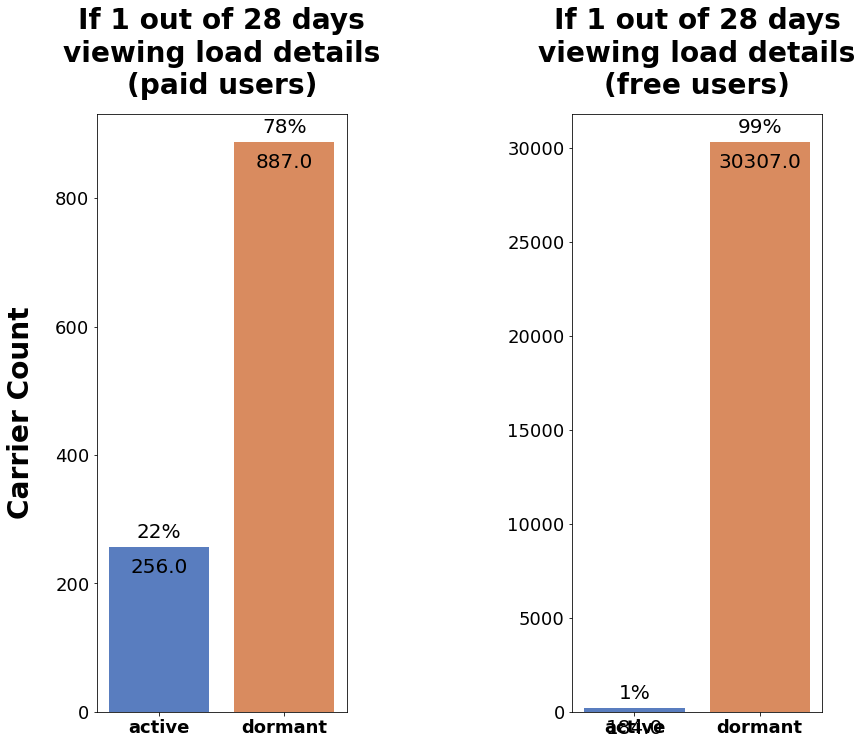

In [27]:
all_users(1,1)